# Restaurant Sales Forecasting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the Dataset

In [2]:
import pandas as pd

In [3]:
dff=pd.read_csv(r"/content/drive/MyDrive/FYP/Restaurant-Sales-forecasting-main/Restaurant Sales.csv")

In [4]:
dft=dff[730:]

In [5]:
dft

,date,inside_sales,outside_sales,inside_covers,outside_covers,reserved_covers,walkin_covers,waitlist_covers,no_show_covers,no_show_parties,no_show_cover_rate
730,02-01-2019,12685.24,0.00,183.0,0,132.0,0.0,51.0,4.0,1.0,0.030303
731,03-01-2019,13580.96,0.00,184.0,0,131.0,0.0,53.0,6.0,2.0,0.045802
732,04-01-2019,16002.75,0.00,197.0,0,138.0,0.0,59.0,6.0,2.0,0.043478
733,05-01-2019,16463.62,0.00,216.0,0,157.0,0.0,59.0,0.0,0.0,0.000000
734,06-01-2019,12405.14,0.00,178.0,0,113.0,2.0,63.0,8.0,3.0,0.070796
...,...,...,...,...,...,...,...,...,...,...,...
905,26-06-2019,12605.00,4487.50,179.0,67,149.0,0.0,97.0,6.0,2.0,0.040268
906,27-06-2019,13675.62,5443.00,170.0,80,143.0,0.0,107.0,5.0,2.0,0.034965
907,28-06-2019,14171.25,6180.50,177.0,74,145.0,0.0,106.0,12.0,4.0,0.082759
908,29-06-2019,14695.50,5369.75,189.0,72,135.0,3.0,123.0,10.0,5.0,0.074074


In [6]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 730 to 909
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                180 non-null    object 
 1   inside_sales        180 non-null    float64
 2   outside_sales       180 non-null    float64
 3   inside_covers       179 non-null    float64
 4   outside_covers      180 non-null    int64  
 5   reserved_covers     179 non-null    float64
 6   walkin_covers       179 non-null    float64
 7   waitlist_covers     179 non-null    float64
 8   no_show_covers      179 non-null    float64
 9   no_show_parties     179 non-null    float64
 10  no_show_cover_rate  179 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 15.6+ KB


In [7]:
dft.isnull().sum()

,0
date,0
inside_sales,0
outside_sales,0
inside_covers,1
outside_covers,0
reserved_covers,1
walkin_covers,1
waitlist_covers,1
no_show_covers,1
no_show_parties,1


In [8]:
dft=dft.dropna()

In [9]:
dft.isnull().sum()

,0
date,0
inside_sales,0
outside_sales,0
inside_covers,0
outside_covers,0
reserved_covers,0
walkin_covers,0
waitlist_covers,0
no_show_covers,0
no_show_parties,0


<ipython-input-12-5b5f0168d1aa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['date'] = pd.to_datetime(dft['date'], format='%d-%m-%Y')  # Specify the correct format


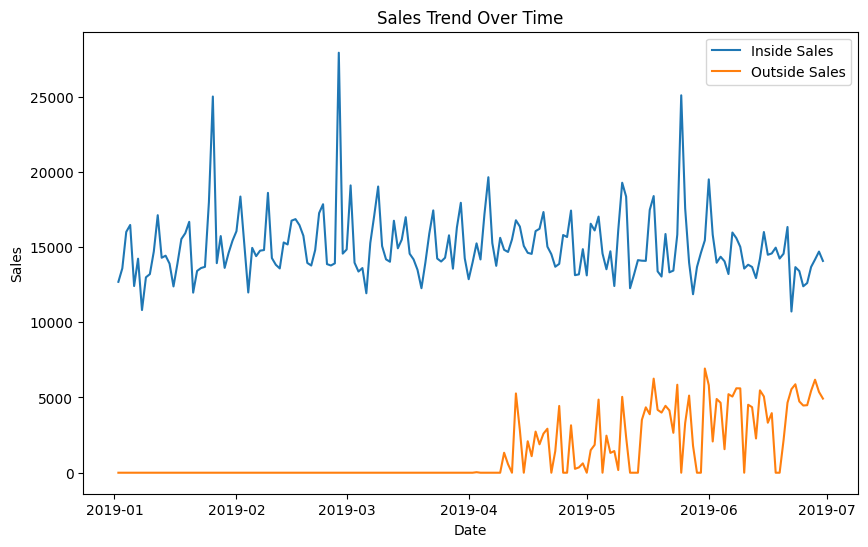

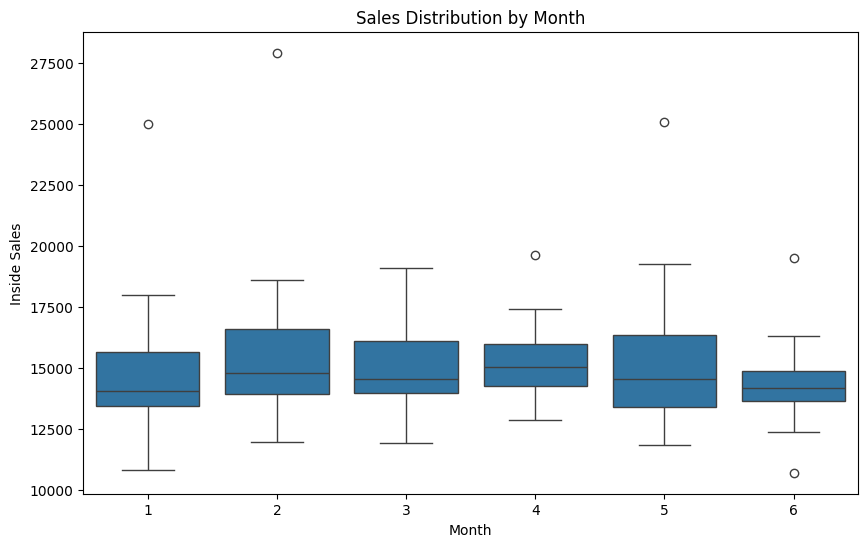

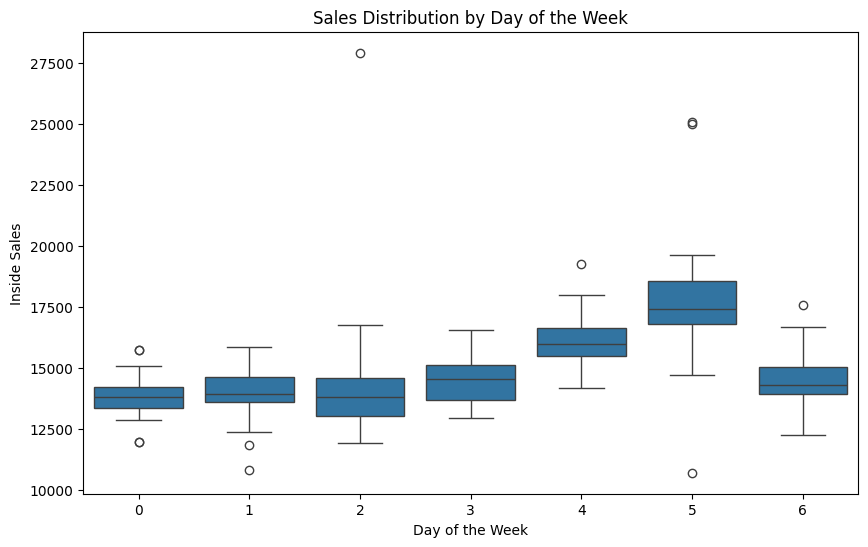

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dft' is your DataFrame

# Convert 'date' column to datetime objects with the correct format
dft['date'] = pd.to_datetime(dft['date'], format='%d-%m-%Y')  # Specify the correct format

# Set 'date' column as index
dft = dft.set_index('date')

# Extracting date-related features from the index
dft['year'] = dft.index.year
dft['month'] = dft.index.month
dft['day'] = dft.index.day
dft['dayofweek'] = dft.index.dayofweek
dft['quarter'] = dft.index.quarter

# Visualizing sales trend over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(dft.index, dft['inside_sales'], label='Inside Sales')
plt.plot(dft.index, dft['outside_sales'], label='Outside Sales')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Visualizing sales distribution by month
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='inside_sales', data=dft)
plt.title('Sales Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Inside Sales')
plt.show()

# Visualizing sales distribution by day of the week
plt.figure(figsize=(10,6))
sns.boxplot(x='dayofweek', y='inside_sales', data=dft)
plt.title('Sales Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Inside Sales')
plt.show()


# Time Series Visualization

In [13]:
import statsmodels.api as sm


<ipython-input-17-f3efc089790a>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['inside_sales'].resample('M').sum()


<Axes: xlabel='date'>

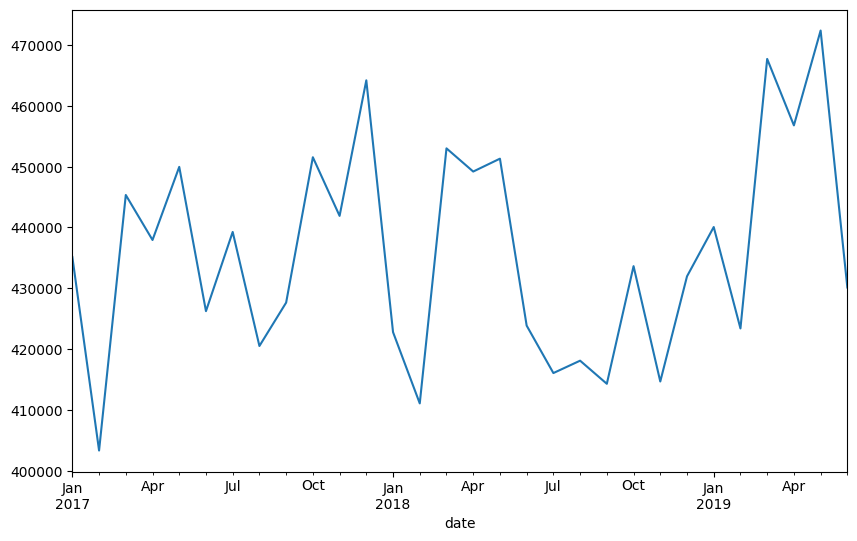

In [17]:
import pandas as pd

# Load the data
df = pd.read_csv(r"/content/drive/MyDrive/FYP/Restaurant-Sales-forecasting-main/Restaurant Sales.csv", parse_dates=['date'], index_col='date')

# Ensure 'date' is set as the index and it is a DatetimeIndex
df.index = pd.to_datetime(df.index, format='%d-%m-%Y')  # This line ensures the index is of type DatetimeIndex
df.index = pd.to_datetime(df.index)  # This line ensures the index is of type DatetimeIndex

# Resample the data to monthly frequency
monthly_sales = df['inside_sales'].resample('M').sum()

# Visualize the data
monthly_sales.plot(figsize=(10, 6))



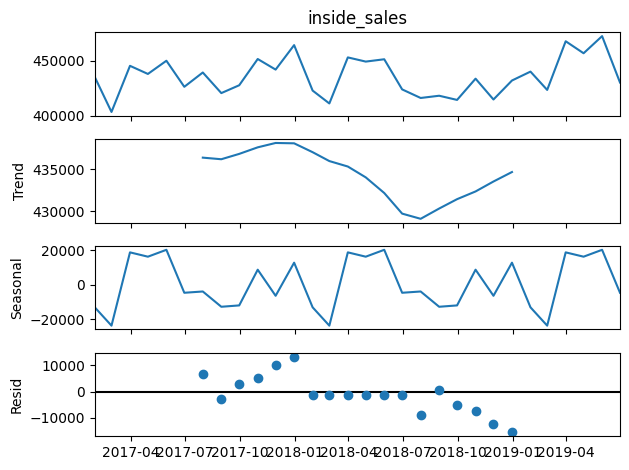

In [18]:

# Decompose the time series into trend, seasonal, and residual components
decomposition = sm.tsa.seasonal_decompose(monthly_sales, model='additive')
fig = decomposition.plot()



## Autoregressive Integrated Moving Average (ARIMA):

In [19]:
dfn = pd.read_csv(r"/content/drive/MyDrive/FYP/Restaurant-Sales-forecasting-main/Restaurant Sales.csv", parse_dates=['date'], index_col='date')


In [20]:
df=dfn[:729]

In [23]:
df.index = pd.to_datetime(df.index, format='%d-%m-%Y', errors='coerce')
monthly_sales = df['inside_sales'].resample('M').sum()


<ipython-input-23-5925c5fba753>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['inside_sales'].resample('M').sum()


In [24]:
monthly_sales

,inside_sales
date,
2017-01-31,435149.84
2017-02-28,403370.59
2017-03-31,445337.06
2017-04-30,437945.69
2017-05-31,449954.33
2017-06-30,426260.36
2017-07-31,439267.55
2017-08-31,420536.30
2017-09-30,427663.77


In [25]:
# Fit an ARIMA model to the data
model = sm.tsa.ARIMA(monthly_sales, order=(1,1,1))
results = model.fit()



In [27]:
# Generate predictions for the next 12 months
forecast = results.predict(start=len(monthly_sales), end=len(monthly_sales)+11, dynamic=False)



# 2019 Sales Forecast

<Axes: >

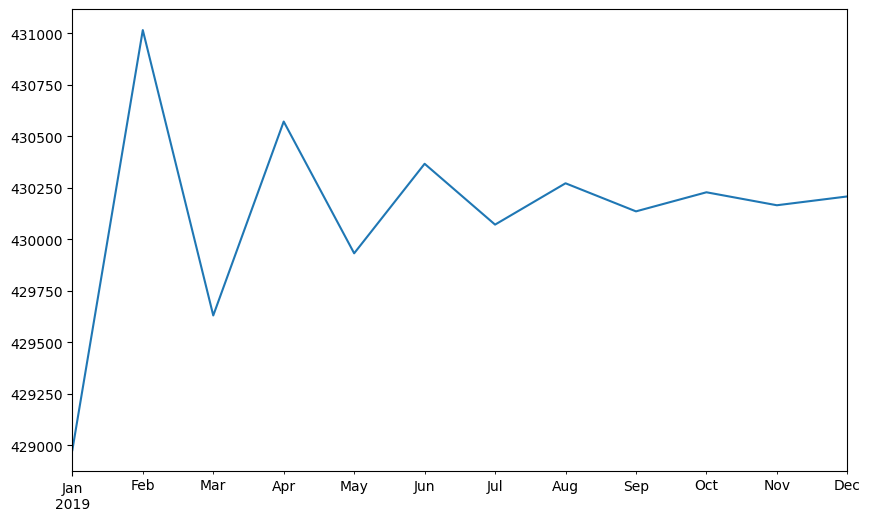

In [28]:
# Visualize the forecast
forecast.plot(figsize=(10, 6))

# 2019 Actual Sales

In [29]:
dfa=dfn[729:]

In [32]:
dfa.index = pd.to_datetime(dfa.index, format='%d-%m-%Y')
actual_sales = dfa['inside_sales'].resample('M').sum()


<ipython-input-32-3612b2c53c27>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  actual_sales = dfa['inside_sales'].resample('M').sum()


<Axes: xlabel='date'>

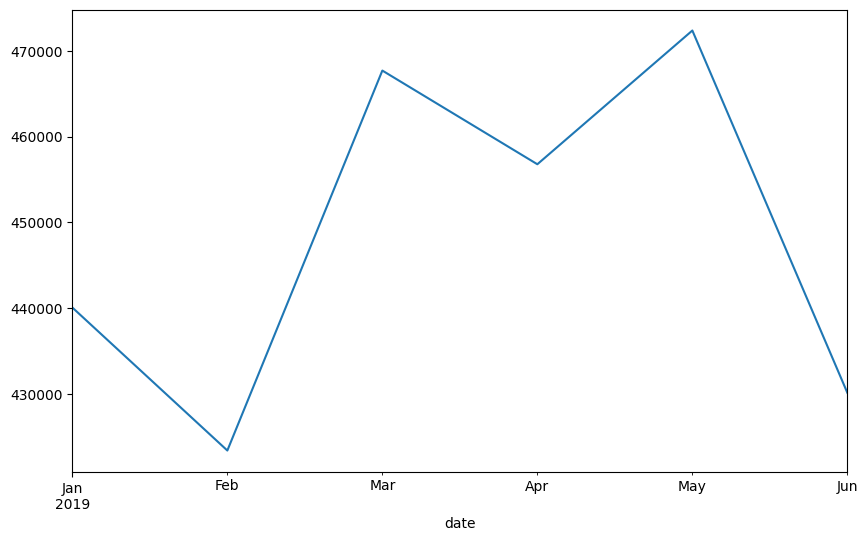

In [33]:
# Visualize the data
actual_sales.plot(figsize=(10, 6))

In [34]:
import numpy as np
# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(forecast - actual_sales))

# Calculate the mean squared error (MSE)
mse = np.mean((forecast - actual_sales)**2)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 20930.13541884108
MSE: 685737776.7257732
RMSE: 26186.595363387223


# Seasonal ARIMA (SARIMA):

In [35]:
monthly_sales = df['inside_sales'].resample('M').sum()


<ipython-input-35-687f573b0020>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['inside_sales'].resample('M').sum()


In [36]:
monthly_sales

,inside_sales
date,
2017-01-31,435149.84
2017-02-28,403370.59
2017-03-31,445337.06
2017-04-30,437945.69
2017-05-31,449954.33
2017-06-30,426260.36
2017-07-31,439267.55
2017-08-31,420536.30
2017-09-30,427663.77


In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model
order = (1, 1, 1)  # Set the order of the ARIMA component
seasonal_order = (1, 0, 0, 12)  # Set the order of the seasonal component
model = SARIMAX(monthly_sales, order=order, seasonal_order=seasonal_order)

# Fit the SARIMA model to the data
result = model.fit()

# Generate predictions from the SARIMA model
n_steps = 12  # Set the number of steps ahead to forecast
forecast = result.forecast(steps=n_steps)

# Print the forecasted values
print(forecast)

2019-01-31    432232.449139
2019-02-28    435633.883151
2019-03-31    430291.435301
2019-04-30    431843.813675
2019-05-31    430785.818920
2019-06-30    433790.918512
2019-07-31    434019.371452
2019-08-31    434163.383244
2019-09-30    434263.522160
2019-10-31    432750.933951
2019-11-30    434277.422954
2019-12-31    432862.753880
Freq: ME, Name: predicted_mean, dtype: float64


# 2019 Sales Forecast

<Axes: >

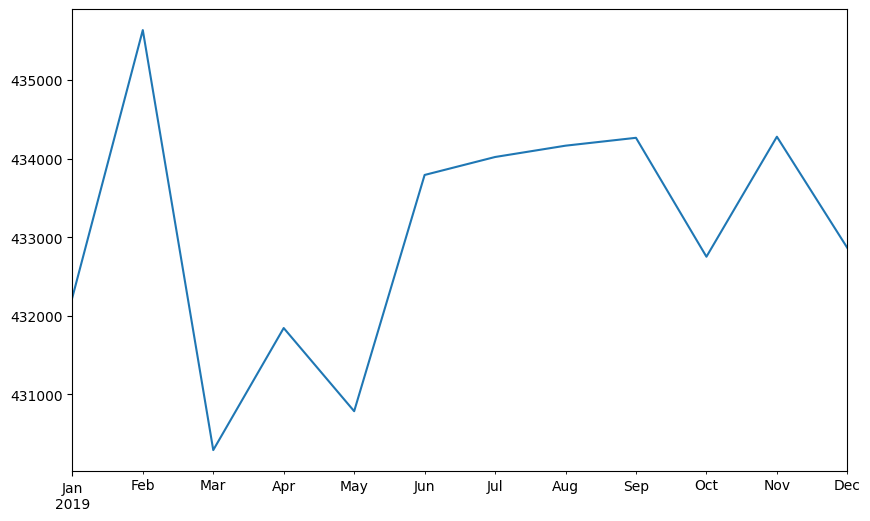

In [38]:
# Visualize the forecast
forecast.plot(figsize=(10, 6))

<Axes: xlabel='date'>

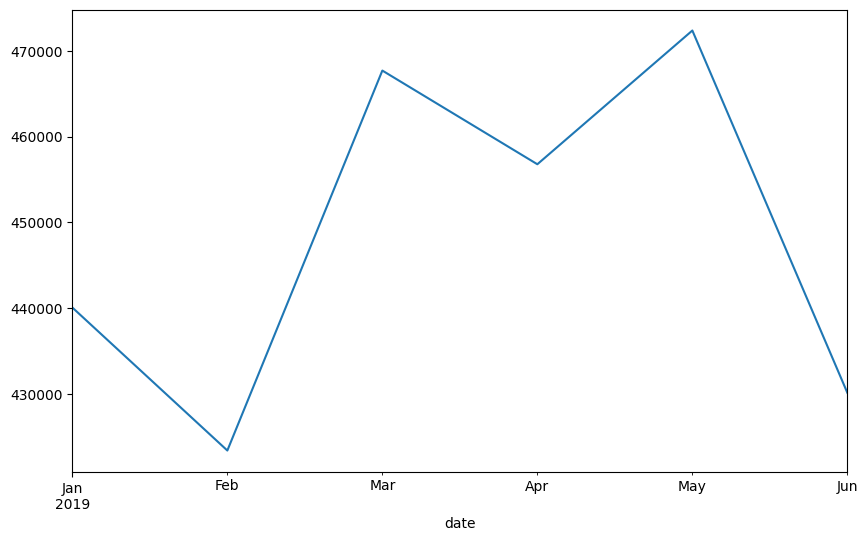

In [39]:
# Visualize the forecast
actual_sales.plot(figsize=(10, 6))

In [40]:
import numpy as np


# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(forecast - actual_sales))

# Calculate the mean squared error (MSE)
mse = np.mean((forecast - actual_sales)**2)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


MAE: 21263.589104618848
MSE: 661817017.9468741
RMSE: 25725.80451505597


# Neural networks:

## Trained everyday sales

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tensorflow import keras
from tensorflow.keras import layers

# Load the dataset
data = df
data=data.dropna()
# Set the target variable and features
target = 'inside_sales'
features = ['outside_sales', 'inside_covers', 'outside_covers', 'reserved_covers', 'walkin_covers', 'waitlist_covers', 'no_show_covers', 'no_show_parties', 'no_show_cover_rate']

# Split the data into training and testing sets
train_data = data.loc['2017-02-01':'2018-12-01']
test_data = dfa


# Create the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(features)]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
test_data=test_data.dropna()

In [43]:
# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss='mse', optimizer='adam')

# Fit the model to the training data
history = model.fit(train_data[features], train_data[target], epochs=100, batch_size=32, verbose=0)



In [44]:
# Make predictions on the test data
test_data['predicted_sales'] = model.predict(test_data[features])

test_data=test_data.dropna()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


<ipython-input-44-5edc77a807eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_sales'] = model.predict(test_data[features])


R-squared: -0.51


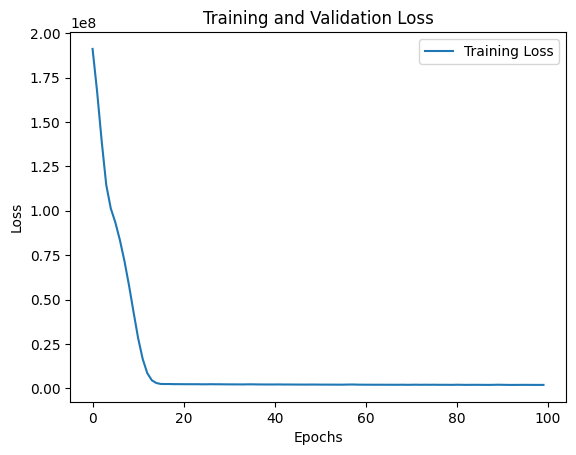

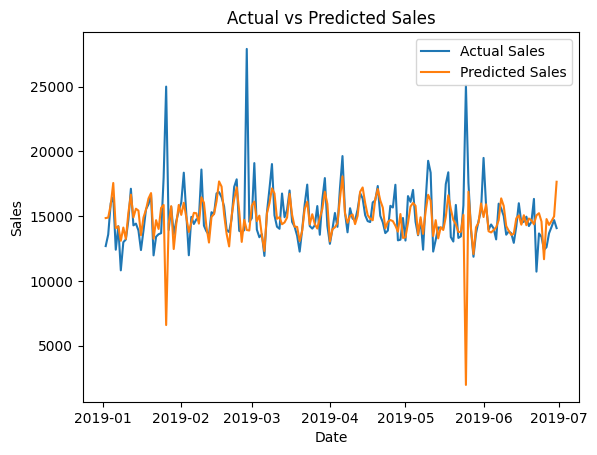

In [45]:
# Evaluate the model using R-squared
r2 = r2_score(test_data[target], test_data['predicted_sales'])
print(f'R-squared: {r2:.2f}')

# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the actual and predicted sales for the test data
plt.plot(test_data.index, test_data[target], label='Actual Sales')
plt.plot(test_data.index, test_data['predicted_sales'], label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

In [46]:
test_data[target]

,inside_sales
date,
2019-01-02,12685.24
2019-01-03,13580.96
2019-01-04,16002.75
2019-01-05,16463.62
2019-01-06,12405.14
...,...
2019-06-26,12605.00
2019-06-27,13675.62
2019-06-28,14171.25


In [47]:
test_data['predicted_sales']

,predicted_sales
date,
2019-01-02,14849.000977
2019-01-03,14887.542969
2019-01-04,15886.282227
2019-01-05,17557.912109
2019-01-06,14071.332031
...,...
2019-06-26,14772.143555
2019-06-27,14320.610352
2019-06-28,14619.550781


In [48]:
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(test_data[target], test_data['predicted_sales'])
rmse = math.sqrt(mse)

print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)


Mean Squared Error:  7419267.772097582
Root Mean Squared Error:  2723.8332863994415


## Trained everyMonth sales


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tensorflow import keras
from tensorflow.keras import layers

# Load the dataset
data = df
data=data.dropna()

# Set the target variable and features
target = 'inside_sales'
features = ['outside_sales', 'inside_covers', 'outside_covers', 'reserved_covers', 'walkin_covers', 'waitlist_covers', 'no_show_covers', 'no_show_parties', 'no_show_cover_rate']

# Split the data into training and testing sets
train_data = data.loc['2017-02-01':'2018-12-01']
test_data = dfa


train_data = train_data.apply(lambda x: x.resample('M').sum())
test_data  = test_data.apply(lambda x: x.resample('M').sum())


# Create the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(features)]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])



<ipython-input-50-b5dbb1949b9c>:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  train_data = train_data.apply(lambda x: x.resample('M').sum())
<ipython-input-50-b5dbb1949b9c>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  test_data  = test_data.apply(lambda x: x.resample('M').sum())


In [51]:
# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss='mse', optimizer='adam')

# Fit the model to the training data
history = model.fit(train_data[features], train_data[target], epochs=100, batch_size=32, verbose=0)



In [52]:
# Make predictions on the test data
test_data['predicted_sales'] = model.predict(test_data[features])

test_data=test_data.dropna()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


R-squared: -289.69


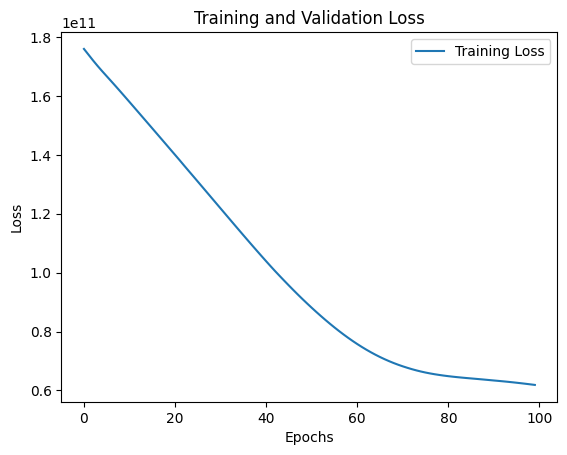

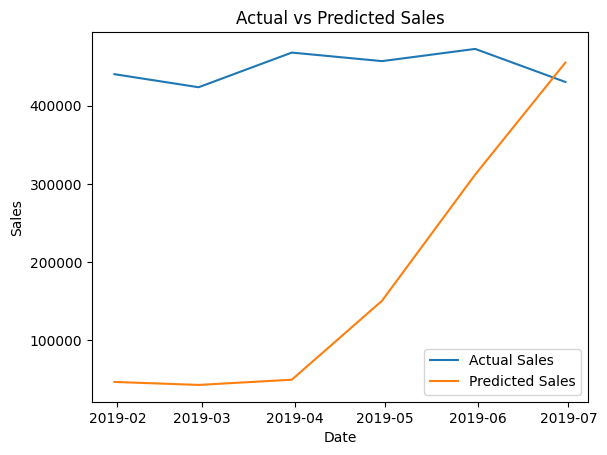

In [53]:
# Evaluate the model using R-squared
r2 = r2_score(test_data[target], test_data['predicted_sales'])
print(f'R-squared: {r2:.2f}')

# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the actual and predicted sales for the test data
plt.plot(test_data.index, test_data[target], label='Actual Sales')
plt.plot(test_data.index, test_data['predicted_sales'], label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

# Merging Weather Data

In [54]:
weather=pd.read_csv(r"/content/drive/MyDrive/FYP/Restaurant-Sales-forecasting-main/Weather Data.csv")

In [55]:
weather

,date,apparent_temperature,humidity,precip_intensity_max,precip_max_time,precip_prob,precip_type,pressure,summary,temperature
0,2017-01-01,37.83,0.54,0.0000,05:01AM,0.00,none,1028.26,clear-night,37.83
1,2017-01-02,35.58,0.92,0.0242,03:00PM,0.79,rain,1027.98,rain,39.06
2,2017-01-03,41.50,0.94,0.0913,05:00PM,0.77,rain,1000.08,rain,43.19
3,2017-01-04,36.81,0.40,0.0176,12:00AM,0.00,rain,1002.55,clear-night,42.29
4,2017-01-05,27.11,0.48,0.0000,05:01AM,0.00,none,1014.61,cloudy,31.36
...,...,...,...,...,...,...,...,...,...,...
906,2019-06-26,84.66,0.44,0.0005,12:00AM,0.00,rain,1015.75,partly-cloudy-day,84.66
907,2019-06-27,86.30,0.34,0.0002,12:00AM,0.00,none,1018.94,partly-cloudy-day,86.30
908,2019-06-28,83.14,0.43,0.0000,05:01AM,0.00,none,1019.31,partly-cloudy-day,83.14
909,2019-06-29,77.20,0.77,0.0571,06:00PM,0.01,rain,1011.84,partly-cloudy-day,76.27


In [56]:
weather['date'] = pd.to_datetime(weather['date'])

In [57]:
weather.isnull().sum()

,0
date,0
apparent_temperature,0
humidity,0
precip_intensity_max,0
precip_max_time,0
precip_prob,0
precip_type,0
pressure,0
summary,0
temperature,0


In [58]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  911 non-null    datetime64[ns]
 1   apparent_temperature  911 non-null    float64       
 2   humidity              911 non-null    float64       
 3   precip_intensity_max  911 non-null    float64       
 4   precip_max_time       911 non-null    object        
 5   precip_prob           911 non-null    float64       
 6   precip_type           911 non-null    object        
 7   pressure              911 non-null    float64       
 8   summary               911 non-null    object        
 9   temperature           911 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 71.3+ KB


In [59]:
df = pd.read_csv(r"/content/drive/MyDrive/FYP/Restaurant-Sales-forecasting-main/Restaurant Sales.csv", parse_dates=['date'], index_col='date')


In [66]:
weather['date'] = pd.to_datetime(weather['date']) # Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')    # Ensure 'date' in df is also datetime
merged_data = pd.merge(df, weather, on='date', how='left') # Merge on 'date' column


In [67]:
merged_data

,date,inside_sales,outside_sales,inside_covers,outside_covers,reserved_covers,walkin_covers,waitlist_covers,no_show_covers,no_show_parties,no_show_cover_rate,apparent_temperature,humidity,precip_intensity_max,precip_max_time,precip_prob,precip_type,pressure,summary,temperature
0,2017-01-02,13159.84,0.00,174.0,0,106.0,26.0,42.0,17.0,6.0,0.160377,35.58,0.92,0.0242,03:00PM,0.79,rain,1027.98,rain,39.06
1,2017-01-03,12442.11,0.00,181.0,0,119.0,31.0,31.0,14.0,4.0,0.117647,41.50,0.94,0.0913,05:00PM,0.77,rain,1000.08,rain,43.19
2,2017-01-04,12927.64,0.00,174.0,0,131.0,17.0,26.0,5.0,2.0,0.038168,36.81,0.40,0.0176,12:00AM,0.00,rain,1002.55,clear-night,42.29
3,2017-01-05,14457.79,0.00,191.0,0,138.0,25.0,28.0,4.0,2.0,0.028986,27.11,0.48,0.0000,05:01AM,0.00,none,1014.61,cloudy,31.36
4,2017-01-06,15331.97,0.00,200.0,0,130.0,16.0,54.0,6.0,3.0,0.046154,24.74,0.48,0.0019,12:00PM,0.00,snow,1022.80,partly-cloudy-night,29.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,2019-06-26,12605.00,4487.50,179.0,67,149.0,0.0,97.0,6.0,2.0,0.040268,84.66,0.44,0.0005,12:00AM,0.00,rain,1015.75,partly-cloudy-day,84.66
906,2019-06-27,13675.62,5443.00,170.0,80,143.0,0.0,107.0,5.0,2.0,0.034965,86.30,0.34,0.0002,12:00AM,0.00,none,1018.94,partly-cloudy-day,86.30
907,2019-06-28,14171.25,6180.50,177.0,74,145.0,0.0,106.0,12.0,4.0,0.082759,83.14,0.43,0.0000,05:01AM,0.00,none,1019.31,partly-cloudy-day,83.14
908,2019-06-29,14695.50,5369.75,189.0,72,135.0,3.0,123.0,10.0,5.0,0.074074,77.20,0.77,0.0571,06:00PM,0.01,rain,1011.84,partly-cloudy-day,76.27


In [68]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  910 non-null    datetime64[ns]
 1   inside_sales          910 non-null    float64       
 2   outside_sales         910 non-null    float64       
 3   inside_covers         897 non-null    float64       
 4   outside_covers        910 non-null    int64         
 5   reserved_covers       897 non-null    float64       
 6   walkin_covers         897 non-null    float64       
 7   waitlist_covers       897 non-null    float64       
 8   no_show_covers        897 non-null    float64       
 9   no_show_parties       897 non-null    float64       
 10  no_show_cover_rate    897 non-null    float64       
 11  apparent_temperature  910 non-null    float64       
 12  humidity              910 non-null    float64       
 13  precip_intensity_max

In [69]:
merged_data['month'] = merged_data['date'].dt.month
merged_data['days_week']=merged_data['date'].dt.dayofweek
merged_data['week_day'] = merged_data['date']. dt.day_name()
merged_data['day'] = merged_data['date'].dt.day


In [70]:
merged_data=merged_data.drop(['precip_max_time'], axis=1)

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['precip_type','summary','week_day']:
    merged_data[col] = le.fit_transform(merged_data[col])

In [72]:
merged_datas=merged_data

In [73]:
merged_data=merged_data.drop(['date'], axis=1)

In [74]:
merged_data=merged_data.dropna()

In [75]:
merged_data.isnull().sum()

,0
inside_sales,0
outside_sales,0
inside_covers,0
outside_covers,0
reserved_covers,0
walkin_covers,0
waitlist_covers,0
no_show_covers,0
no_show_parties,0
no_show_cover_rate,0


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(merged_data.drop(['inside_sales'],axis=1),merged_data['inside_sales'],
                                                    test_size =0.4,random_state = 123)

# LinearRegression

In [77]:
from sklearn.linear_model import LinearRegression

# create a linear regression model
lin_model = LinearRegression()

# fit the model to the training data
lin_model.fit(X_train, Y_train)

# make predictions on the test data
y_pred = lin_model.predict(X_test)


In [78]:
# Evaluate the performance of the model
accuracy = lin_model.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.3076683201404107


# DecisionTreeRegressor

In [79]:
from sklearn.tree import DecisionTreeRegressor

# create a decision tree regression model
tree_model = DecisionTreeRegressor()

# fit the model to the training data
tree_model.fit(X_train, Y_train)

# make predictions on the test data
y_pred = tree_model.predict(X_test)


In [80]:
# Evaluate the performance of the model
accuracy = tree_model.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: -0.13480128707858552


# RandomForestRegressor

In [81]:
from sklearn.ensemble import RandomForestRegressor

# create a random forest regression model
rf_model = RandomForestRegressor()

# fit the model to the training data
rf_model.fit(X_train, Y_train)

# make predictions on the test data
y_pred = rf_model.predict(X_test)


In [82]:
# Evaluate the performance of the model
accuracy = rf_model.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.40533175422495715


# SVR

In [83]:
from sklearn.svm import SVR

# create an SVR model
svr_model = SVR()

# fit the model to the training data
svr_model.fit(X_train, Y_train)

# make predictions on the test data
y_pred = svr_model.predict(X_test)


In [84]:
# Evaluate the performance of the model
accuracy = svr_model.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: -0.015401053072821913


# GradientBoostingRegressor

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

# create a gradient boosting regression model
gb_model = GradientBoostingRegressor()

# fit the model to the training data
gb_model.fit(X_train, Y_train)

# make predictions on the test data
y_pred = gb_model.predict(X_test)

# Evaluate the performance of the model
accuracy = gb_model.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.3992232865040787


# Multivariate Time Series Analysis

In [87]:
import matplotlib.pyplot as plt

from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tools.eval_measures import rmse
df=merged_datas
#df.set_index('date', inplace=True)
df.set_index('date', inplace=True) #This line was previously commented out

# Ensure 'date' index is a DatetimeIndex
df.index = pd.to_datetime(df.index) #This line converts the 'date' column to datetime format

df = df.resample('M').sum()
# Select the columns for the multivariate time series analysis
cols = ['inside_sales', 'outside_sales','inside_covers', 'outside_covers','month','reserved_covers','days_week','day','outside_sales','no_show_parties','week_day','waitlist_covers']
# Split the data into training and testing sets
train = df[cols][:len(df)-12]
test = df[cols][len(df)-12:]

# Fit the VAR model to the training data
model = VAR(train)
model_fit = model.fit()


<ipython-input-87-31521395cd98>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum()


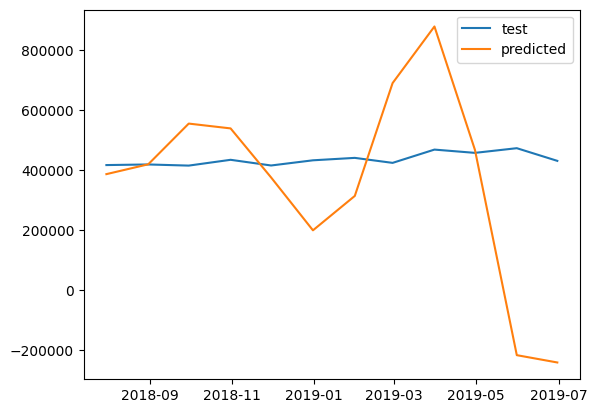

In [88]:
# Make predictions on the testing set
lag_order = model_fit.k_ar
predictions = model_fit.forecast(train.values[-lag_order:], steps=len(test))

# Convert the predictions to a pandas dataframe
pred_df = pd.DataFrame(predictions, index=test.index, columns=cols)


# Plot the predicted and actual values for the inside_sales variable
plt.plot(test['inside_sales'], label='test')
plt.plot(pred_df['inside_sales'], label='predicted')
plt.legend()
plt.show()



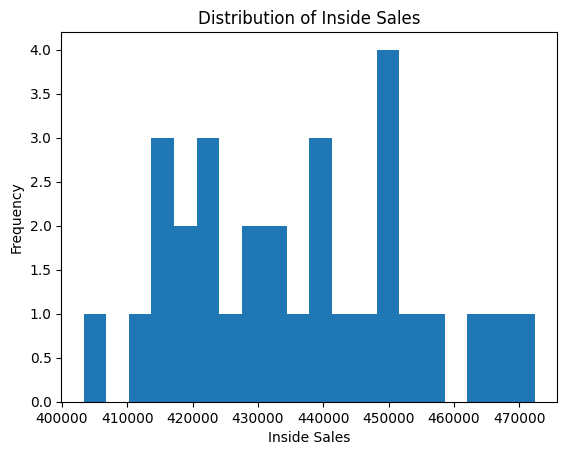

In [89]:
plt.hist(df['inside_sales'], bins=20)
plt.xlabel('Inside Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Inside Sales')
plt.show()


<Axes: >

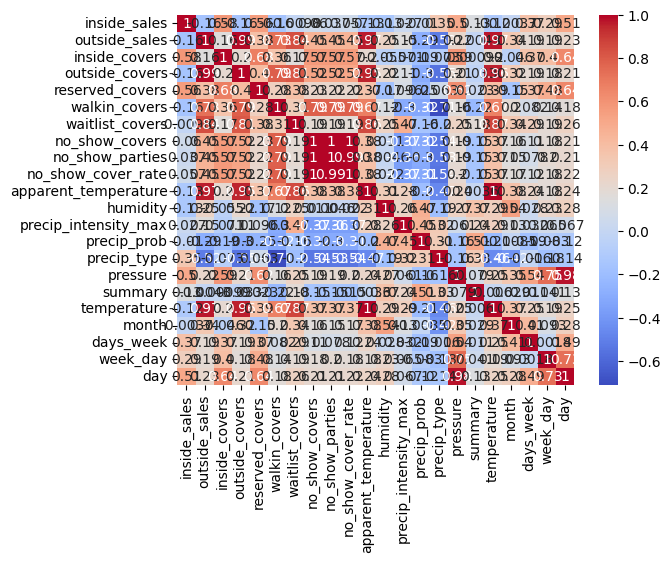

In [90]:
import seaborn as sns

# Create a correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix using seaborn heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


In [91]:
# Import necessary libraries
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Create a Lasso Regression model
lasso = Lasso(alpha=0.1)

# Fit the model on the training set
lasso.fit(X_train, Y_train)

# Predict on the testing set
y_pred = lasso.predict(X_test)

# Calculate mean squared error and R-squared score
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.108e+08, tolerance: 1.757e+05
  model = cd_fast.enet_coordinate_descent(


In [92]:
# Evaluate the performance of the model
accuracy = lasso.score(X_train, Y_train)
print("Accuracy:", accuracy)

Accuracy: 0.34779353893396625


In [93]:
from sklearn.ensemble import RandomForestRegressor

# Split data into X and y
df1=dff.dropna()
df1.set_index('date', inplace=True)

X = df1.drop('inside_sales',axis=1)
#X = df1.drop('date',axis=1)
y = df1['inside_sales']

# Initialize a Random Forest model
rf = RandomForestRegressor()

# Fit the model on the data
rf.fit(X, y)

# Get feature importances
importances = pd.DataFrame({'feature':X.columns, 'importance':rf.feature_importances_})

# Sort the features by importance
importances = importances.sort_values('importance', ascending=False)

# Print the feature importances
print(importances)


              feature  importance
1       inside_covers    0.376542
3     reserved_covers    0.226209
5     waitlist_covers    0.105658
8  no_show_cover_rate    0.089365
4       walkin_covers    0.088052
6      no_show_covers    0.032680
7     no_show_parties    0.028369
0       outside_sales    0.026770
2      outside_covers    0.026355


# Stacked Classifier

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np


df=df.dropna()
df=df.drop(columns=['apparent_temperature','humidity','precip_intensity_max',	'precip_prob',	'precip_type',	'pressure',	'summary'	,'temperature'	,'month',	'days_week'	,'week_day',	'day'])


X_train=df.drop(columns=['inside_sales'])
X_train = X_train[:24]


In [95]:
y_train=df['inside_sales']
y_train = y_train[:24]


In [96]:

X_test=df.drop(columns=['inside_sales'])
y_test=df['inside_sales']
X_test = X_test[24:]
y_test = y_test[24:]

In [97]:


# First-level models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the first-level models on the training set
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Make predictions on the test set using the first-level models
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)

# Create a second-level model
X_second_level_train = np.column_stack((lr_pred, rf_pred, gb_pred))
second_level_model = LinearRegression()
second_level_model.fit(X_second_level_train, y_test)

# Make predictions on the test set using the stacked model
X_second_level_test = np.column_stack((lr.predict(X_test), rf.predict(X_test), gb.predict(X_test)))
y_pred = second_level_model.predict(X_second_level_test)



In [98]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 134023760.5700742


In [99]:
mse

134023760.5700742

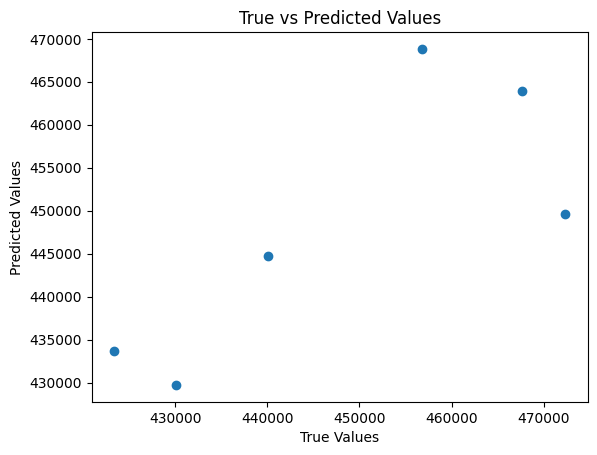

In [100]:
# Create a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()